# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [131]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data processing libraries
import pandas as pd

# Visuals
#!pip install graphviz
#!pip install pydotplus
#!pip install IPython
import graphviz
import pydotplus
from IPython.display import Image
from matplotlib import pyplot as plt

## Loading datasets

In [8]:
df = pd.read_csv(r"League_Result_Data/Encoded_PremierLeague_Stats_From_2014to2021.csv")
time_df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2569 non-null   int64  
 1   Season                 2569 non-null   object 
 2   Season Encoding        2569 non-null   int64  
 3   Date                   2569 non-null   object 
 4   YearOfSeason           2414 non-null   object 
 5   HomeTeam               2569 non-null   object 
 6   HomeTeam Encoding      2569 non-null   int64  
 7   AwayTeam               2569 non-null   object 
 8   AwayTeam Encoding      2569 non-null   int64  
 9   FTHG                   2569 non-null   float64
 10  FTAG                   2569 non-null   float64
 11  FTR                    2569 non-null   object 
 12  FTR Encoding           2569 non-null   int64  
 13  HTHG                   2569 non-null   float64
 14  HTAG                   2569 non-null   float64
 15  HTR 

In [303]:
"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["HTHG", "HTAG", "HTR Encoding", "Unnamed: 0", "FTHG", "FTAG", "Season", "YearOfSeason", "Date", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

"""
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Unnamed: 0", "Season", "YearOfSeason", "Date", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "Referee"])
# Labels
y = df["FTR Encoding"]

In [304]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        2569 non-null   int64  
 1   HomeTeam Encoding      2569 non-null   int64  
 2   AwayTeam Encoding      2569 non-null   int64  
 3   FTHG                   2569 non-null   float64
 4   FTAG                   2569 non-null   float64
 5   HTHG                   2569 non-null   float64
 6   HTAG                   2569 non-null   float64
 7   HTR Encoding           2569 non-null   int64  
 8   Referee Encoding       2569 non-null   int64  
 9   Fouls Called Per Game  2569 non-null   float64
 10  HS                     2569 non-null   float64
 11  AS                     2569 non-null   float64
 12  HST                    2569 non-null   float64
 13  AST                    2569 non-null   float64
 14  HF                     2569 non-null   float64
 15  AF  

In [305]:
X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,FTHG,FTAG,HTHG,HTAG,HTR Encoding,Referee Encoding,Fouls Called Per Game,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,8,0,0.0,3.0,0.0,1.0,1,7,14.0,...,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0
1,0,6,21,1.0,0.0,1.0,0.0,0,27,14.0,...,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0
2,0,13,11,4.0,3.0,3.0,2.0,0,28,14.0,...,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0
3,0,28,17,0.0,2.0,0.0,0.0,2,11,13.0,...,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0
4,0,27,12,0.0,3.0,0.0,0.0,2,10,15.0,...,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,0.0,1.0,0.0,1.0,1,27,14.0,...,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0
2565,2,10,15,0.0,0.0,0.0,0.0,2,15,13.0,...,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0
2566,2,12,19,5.0,1.0,2.0,0.0,0,28,14.0,...,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0
2567,2,14,21,2.0,0.0,1.0,0.0,0,2,14.0,...,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0


In [306]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0       1
1       0
2       0
3       1
4       1
       ..
2564    1
2565    2
2566    0
2567    0
2568    0
Name: FTR Encoding, Length: 2569, dtype: int64

In [308]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [309]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [345]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes = 15, 
                                      max_features=10,
                                      random_state=42,
                                      min_samples_split=3)

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [346]:
score = clf_train.score(X_test, y_test)

print(score)

0.9357976653696498


In [347]:
# Confusion Matrix

cv_score = cross_val_score(clf_train, X_train, y_train, cv=3, scoring='accuracy')

print(cv_score, '\n')

y_train_pred = cross_val_predict(clf_train, X_train, y_train, cv=3)
print(confusion_matrix(y_train, y_train_pred))

[0.95766423 0.95182482 0.91240876] 

[[831   4  84]
 [  4 633  12]
 [  7  11 469]]


In [348]:
# Precision, Recall, F1

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       919
           1       0.98      0.98      0.98       649
           2       0.83      0.96      0.89       487

    accuracy                           0.94      2055
   macro avg       0.93      0.95      0.94      2055
weighted avg       0.95      0.94      0.94      2055



## Visualizing the tree

Create visual plots for the decision tree

In [349]:
fn = list(X.columns)
cn ='0', '1', '2'

In [332]:
cn

('0', '1', '2')

[Text(145.37368421052633, 201.90857142857143, 'X[3] <= -0.017\ngini = 0.644\nsamples = 2055\nvalue = [919, 649, 487]'),
 Text(88.10526315789474, 170.84571428571428, 'X[4] <= 0.225\ngini = 0.607\nsamples = 1152\nvalue = [194, 591, 367]'),
 Text(70.48421052631579, 139.78285714285715, 'X[3] <= -0.782\ngini = 0.616\nsamples = 714\nvalue = [194, 153, 367]'),
 Text(35.242105263157896, 108.72, 'X[4] <= -0.612\ngini = 0.5\nsamples = 301\nvalue = [0, 153, 148]'),
 Text(17.621052631578948, 77.65714285714284, 'gini = 0.0\nsamples = 148\nvalue = [0, 0, 148]'),
 Text(52.863157894736844, 77.65714285714284, 'gini = 0.0\nsamples = 153\nvalue = [0, 153, 0]'),
 Text(105.72631578947369, 108.72, 'X[7] <= -0.674\ngini = 0.498\nsamples = 413\nvalue = [194, 0, 219]'),
 Text(88.10526315789474, 77.65714285714284, 'gini = 0.475\nsamples = 129\nvalue = [79, 0, 50]'),
 Text(123.34736842105264, 77.65714285714284, 'X[6] <= -0.069\ngini = 0.482\nsamples = 284\nvalue = [115, 0, 169]'),
 Text(105.72631578947369, 46.59

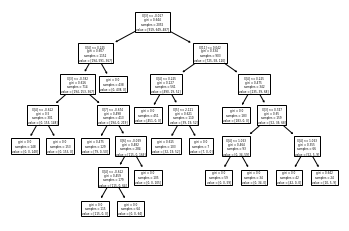

In [333]:
tree.plot_tree(clf_train)

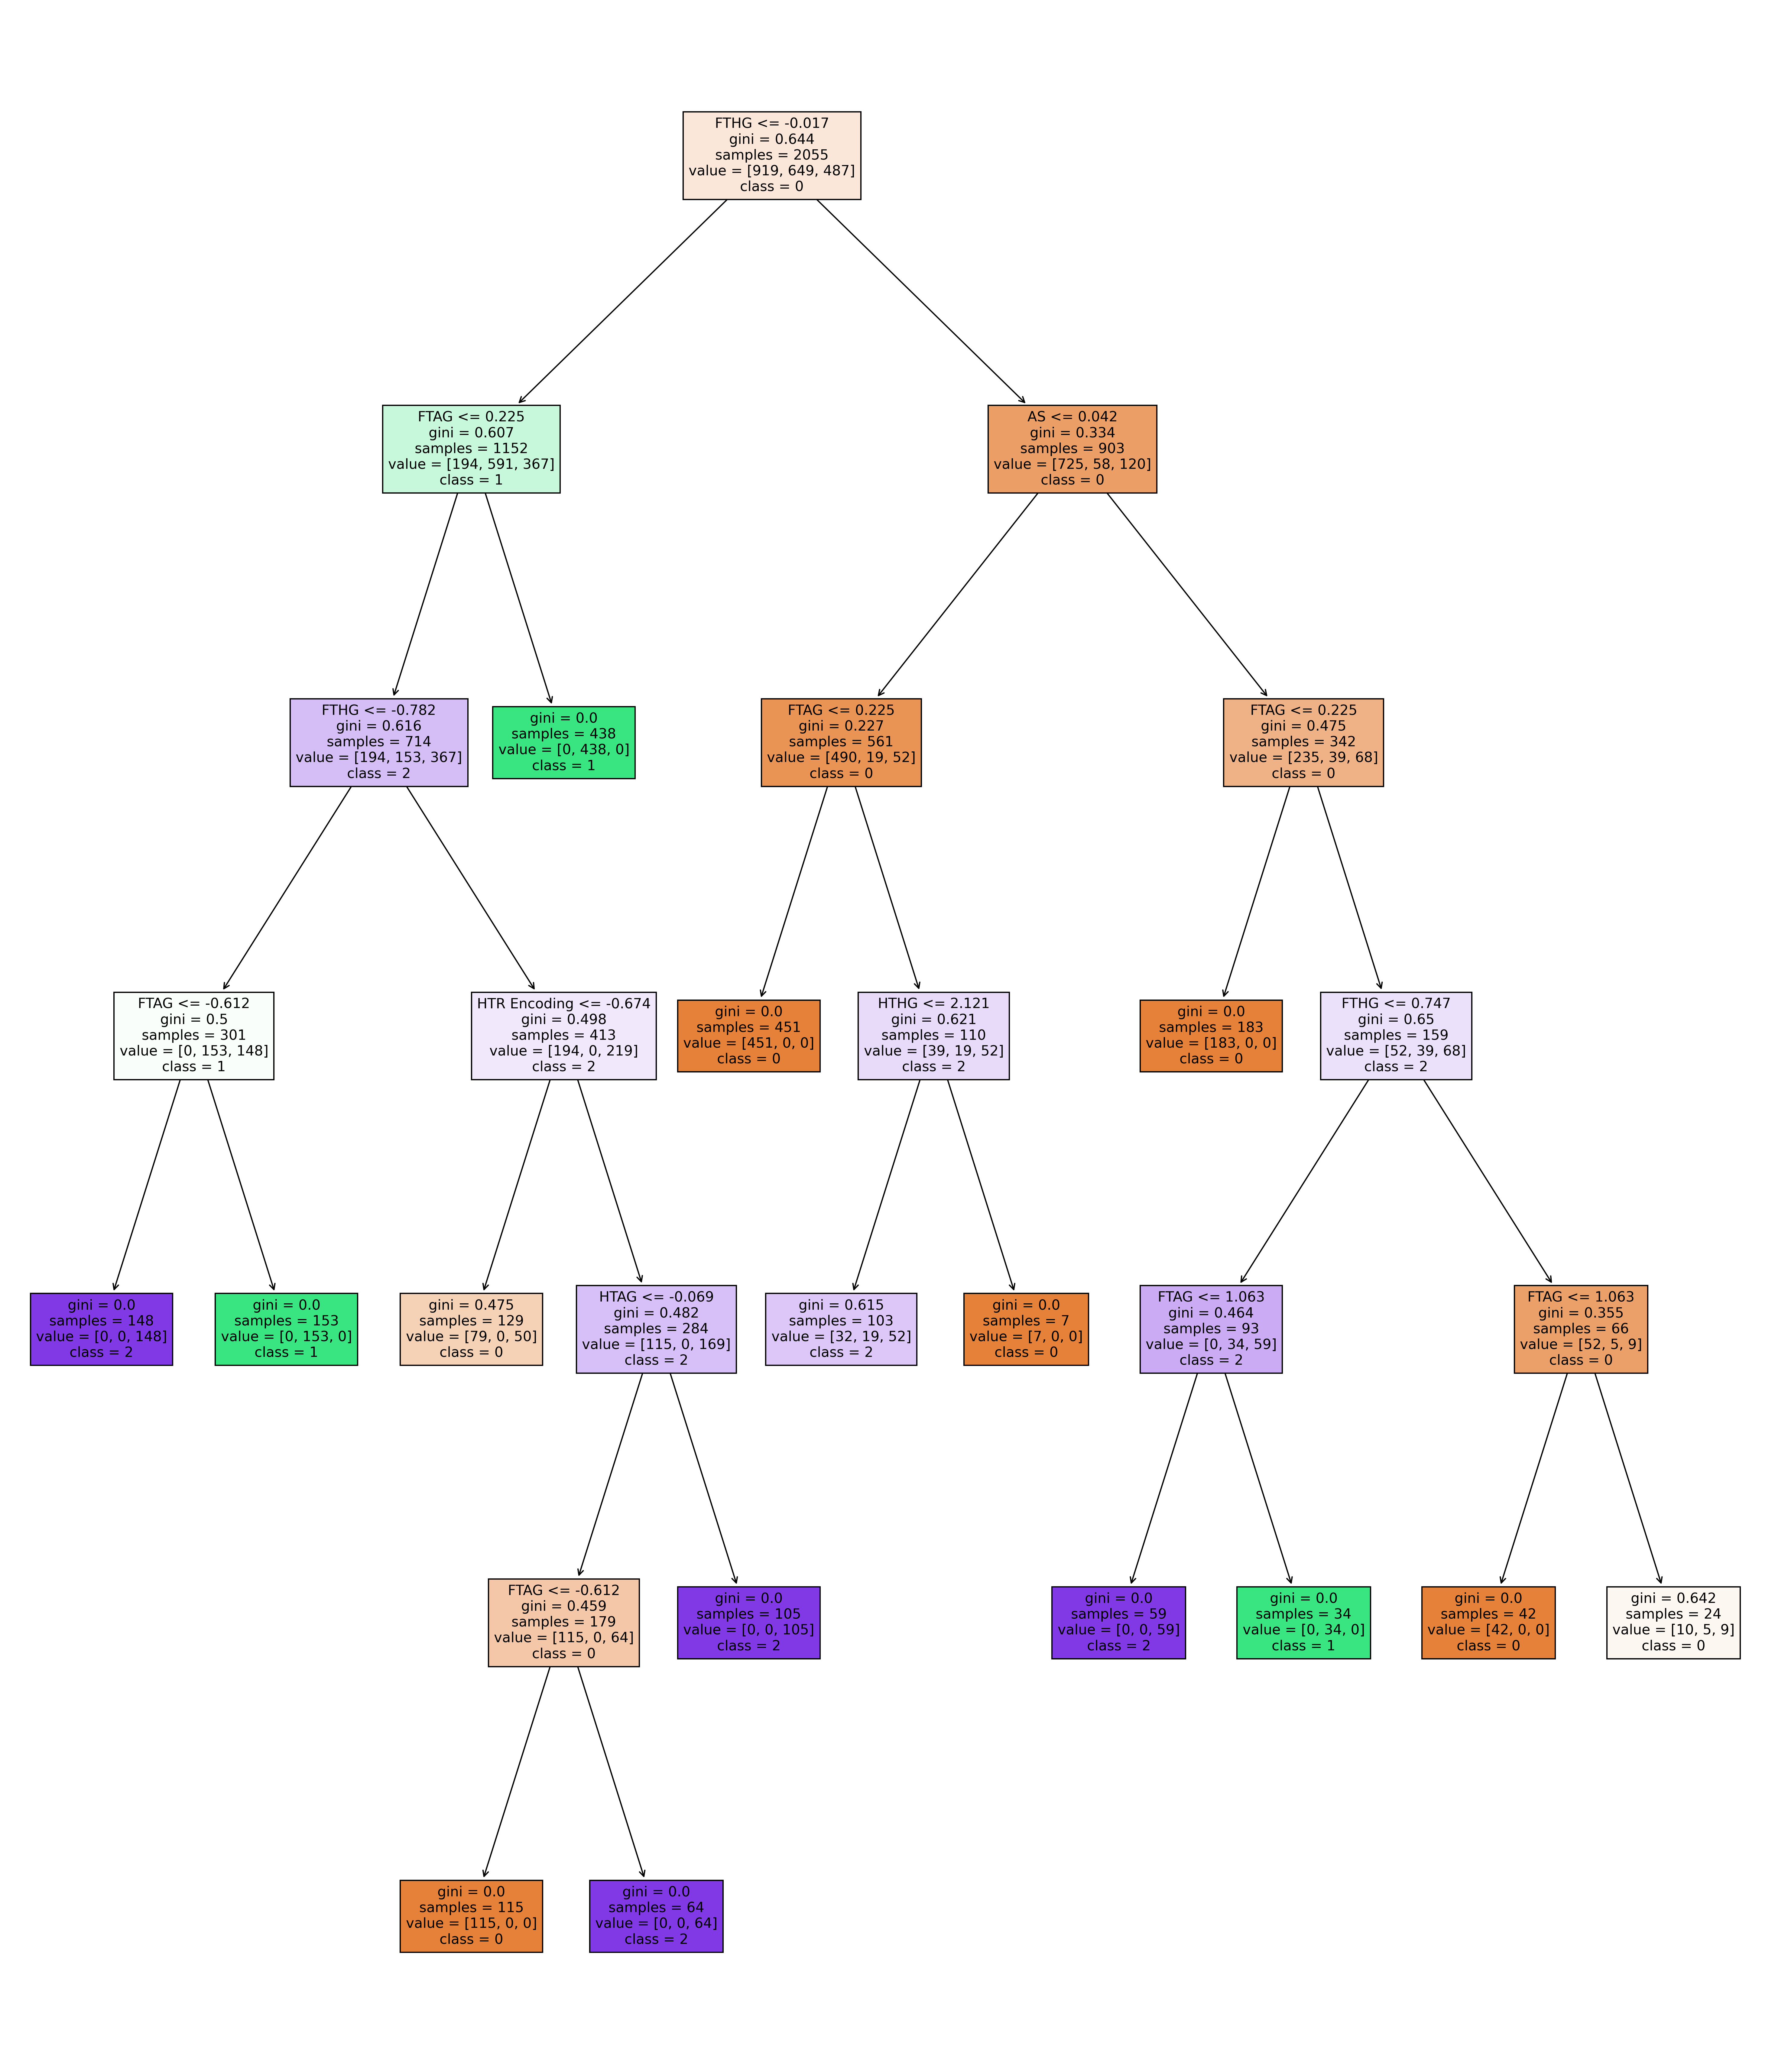

In [334]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d